In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
import time 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


seed = 45

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
df = pd.read_csv('2_Cleaned_Data.csv')

In [3]:
# Split dataset

In [4]:
X = df.drop(['target','hhld_id'],axis=1)
y = df['target']

In [5]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [6]:
#D_train = xgb.DMatrix(X_train, label=Y_train)
#D_test = xgb.DMatrix(X_test, label=Y_test)

In [7]:
learning_rate = 0.1
num_round = 1000
seed = 0
max_depth = 6
min_child_weight = 7
gamma = 0
subsample = 0.8
colsample_bytree = 0.8
scale_pos_weight = 18
reg_alpha = 1
reg_lambda = 1e-5

model = XGBClassifier(learning_rate=learning_rate, n_estimators=num_round, max_depth=max_depth,
                      min_child_weight=min_child_weight, gamma=gamma, subsample=subsample, reg_alpha=reg_alpha,
                      reg_lambda=reg_lambda, colsample_bytree=colsample_bytree, objective='binary:logistic',
                      nthread=4, scale_pos_weight=scale_pos_weight, seed=seed)

In [8]:
# define evaluation procedure
K = 3
cv = StratifiedKFold(n_splits = K, random_state = 1, shuffle = True)

In [9]:
# evaluate model
accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
rocauc_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
recall_scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
precision_scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.3f' % np.mean(accuracy_scores))
print('Mean Roc Auc: %.3f' % np.mean(rocauc_scores))
print('Mean Recall: %.3f' % np.mean(recall_scores))
print('Mean Precision: %.3f' % np.mean(precision_scores))

Mean Accuracy: 0.987
Mean Roc Auc: 0.985
Mean Recall: 0.885
Mean Precision: 0.885


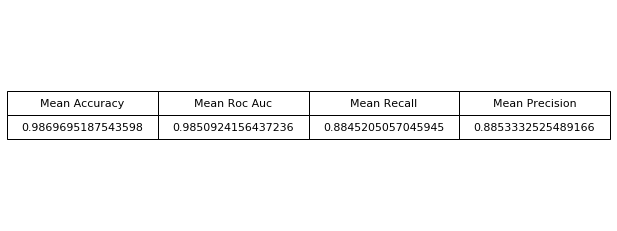

In [10]:
fig, ax =plt.subplots()
clust_data = [[np.mean(accuracy_scores), np.mean(rocauc_scores),np.mean(recall_scores), np.mean(precision_scores)]]
collabel=("Mean Accuracy", "Mean Roc Auc", "Mean Recall", "Mean Precision")
ax.axis('tight')
ax.axis('off')
df = pd.DataFrame(clust_data, columns=collabel)

table= ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.set_fontsize(30)
table.scale(1.8, 2)
plt.savefig('Generated_Image/XGB_Scrore', bbox_inches = 'tight')

plt.show()